In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:

from datetime import datetime as DateTime, timedelta as TimeDelta


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each class/table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

## Measurement Headers
![alt text](Images/MeasurementHeaders.png)
## Station Headers
![alt text](Images/StationHeaders.png)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Display the row's columns and data in dictionary format; showing the first record (top row)
# first_row = session.query(Measurement).first()
# first_row.__dict__
# headers for this query are date and prcp (class also has headers station, id, tobs)


# Look at the first 15 rows of data to determine the order of month and day in date:
# for row in session.query(Measurement.date, Measurement.prcp).limit(15).all():
# print(row)
# headers are date in year-mm-day and prcp in float (example 0.08) or None 

# How many dates are in class? 19550
#session.query(func.count(Measurement.date)).all()

# Calculate the date 1 year ago from the last data point in the database
# What is the last date in the class? 2017-08-23
# session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# First date? 2010-01-01
# session.query(Measurement.date).order_by(Measurement.date).first()


# Perform a query to retrieve the data and precipitation scores from the last year
lastyear = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()
lastyear

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(lastyear, columns=['date', 'precipitation'])
prcp_df.set_index('date', inplace=True)
# prcp_df.dtypes prcp is a float

# Sort the dataframe by date
#prcp2_df = prcp_df.sort_values("date")
prcp2_df = prcp_df.fillna(0)
prcp2_df




,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


In [11]:
# NOTE: There are 7 readings per date for 7 stations.  But we aren't asked to average them at this point, but 
# without averaging, the plot is a mess.  Try averaging across stations for each day:

sel = [Measurement.date, 
       func.avg(Measurement.prcp) 
       ]
daily_avg = session.query(Measurement.date, 
       func.avg(Measurement.prcp)).\
    filter(Measurement.date > '2016-08-22').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
daily_avg

daily_avg_df = pd.DataFrame(daily_avg, columns=['date', 'precipitation'])
daily_avg_df.set_index('date', inplace=True)
daily_avg_df.mean()


precipitation    0.170757
dtype: float64

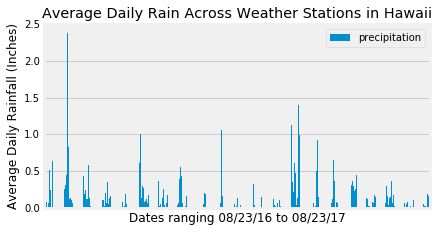

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
# I choose to average the daily data across stations, shown below
# prcp2_df.plot.bar() would plot the daily data at each station, not averaged

daily_avg_df.plot.bar()
plt.tight_layout()
plt.title("Average Daily Rain Across Weather Stations in Hawaii")
plt.xlabel("Dates ranging 08/23/16 to 08/23/17")
plt.ylabel("Average Daily Rainfall (Inches)")
plt.xticks([])
#plt.figure(figsize=(20, 50))
#plt.hlines(0.17, 0, 366, alpha = 0.5)
plt.savefig("Images/avgdailyrain.png", bbox_inches= 'tight')
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp2_df.describe()


,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [14]:
# Design a query to show how many stations are available in this dataset?

# What are the headers in the class Station?
# first_row = session.query(Station).first()
# first_row.__dict__
# headers for the station table are longitude, name, id, elevation, latitude, station

# To print the names:
# station_name = session.query(Station) 
# for name in station_name:
#     print(name.station)

# To count the number of unique stations use this (use .distinct to list them by name):
station_count = session.query(func.count(Station.station)).all()
print(f"The number of unique stations is {station_count}.")


The number of unique stations is [(9,)].


In [15]:
# What are the most active stations? (i.e. what stations have the most rows)? Station USC00519281
# List the stations and the counts in descending order.

station_activity = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
    
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station over the last year in the data set?

# Measurement class headers are date, prcp,  station, id, tobs
# Filter by most active station (USC00519281), order by temp (tobs), and select the first value from the default
# ascending sort for the low value, the first value from the descending sort for the high value, and use the 
# average function to find the average temp (tobs).
low_temp = session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.tobs).first()
low_temp #prints ('USC00519281', 59.0)

high_temp = session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date > '2016-08-22').\
    order_by((Measurement.tobs).desc()).first()
high_temp #prints ('USC00519281', 83.0)

avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.date > '2016-08-22').\
    filter(Measurement.station == "USC00519281").all()   
avg_temp #prints ('USC00519281', 73.10795454545455)

# Print final values:
print(f"Station USC00519281 had a low temp of {low_temp}, a high temp of {high_temp}, an average temp of {avg_temp}.")



Station USC00519281 had a low temp of (59.0,), a high temp of (83.0,), an average temp of [(73.10795454545455,)].


In [17]:
# Choose the station with the highest number of temperature observations. Station USC00519281
# Query the last 12 months of temperature observation data for this station
lastyear281 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()
lastyear281
# Convert to dataframe
lastyear281_df = pd.DataFrame(lastyear281, columns=['date', 'temp'])
lastyear281_df.set_index('date', inplace=True)
lastyear281_df
# Bin data in 12 temp groups
bins = [58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84]
group_names = ["60","62","64","66","68","70","72","74","76","78", "80","82","84"]
lastyear281_df["< or = Temp"] = pd.cut(lastyear281_df["temp"], bins, labels = group_names)
lastyear281_df_temp = lastyear281_df.sort_values("temp")
# Count number of rows in each bin
bin_ct = lastyear281_df_temp["< or = Temp"].value_counts()
bin_ct
# Make results a dataframe and sort by the index (which is the bin name)
bin_ct_df = pd.DataFrame(bin_ct)
bin_ct_df2 = bin_ct_df.sort_index(axis = 0, ascending= True)
bin_ct_df2


,< or = Temp
60,5
62,7
64,7
66,12
68,27
70,41
72,40
74,57
76,66
78,53


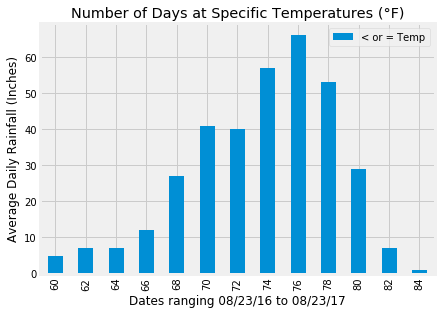

In [18]:
# Plot the query results as a histogram
bin_ct_df2.plot.bar()
plt.tight_layout()
plt.title("Number of Days at Specific Temperatures (°F)")
plt.xlabel("Dates ranging 08/23/16 to 08/23/17")
plt.ylabel("Average Daily Rainfall (Inches)")
plt.savefig("Images/avgdailyrainUSC00519281.png", bbox_inches= 'tight')
plt.show()

# file for Flask and API call is called Hilliker_Surfer_app.py

Note that in trying my code, sometimes I will get an error from a lik that says "Internal Server Error
The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application."  If you get this error, reload the page and it should work.  This was happening regularly to me in the Chrome browser, but I don't think there is an error in the core. 

In [19]:
# ???  Is this next stuff option or not?

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# Assuming a trip for my wedding anniversary: 2017-11-06 to 2017-11-14 look at the previous years data
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-11-06', '2016-11-14')) # printed [(63.0, 73.40350877192982, 79.0)]

[(63.0, 73.40350877192982, 79.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# cal_temp function printed [(70.0, 76.15789473684211, 81.0)] for these dates; I'm reordering the queries as 
# individual variables for making the graph
start_date = '2015-11-06'
end_date = '2015-11-14'
min_temp = session.query(func.min(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
avg_temp = session.query(func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
max_temp = session.query(func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# index tuple to get value as a float
min_temp1 = min_temp[0]
max_temp1 = max_temp[0]
avg_temp1 = avg_temp[0]


avg_temp1 


(76.15789473684211)

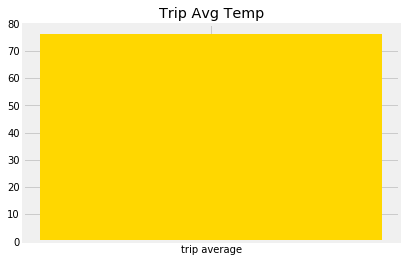

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use the average temperature for the y value
x= "trip average"

plt.bar(x, avg_temp1, facecolor='gold')

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# ??? I can't get errorbars to work.  Documentation shows that this should work, but it isn't.
# lower_error = 76.2-70
# upper_error = 81 - 76.2 
# plt.bar(x, avg_temp1, yerr=[lower_error, upper_error], facecolor='gold')

# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp")
plt.savefig("Images/trip_avg_temp.png")
plt.show()


In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def calc_precip(start_date, end_date):
    
    return session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, \
        Station.elevation, func.sum(Measurement.prcp)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
        group_by(Measurement.station).all()

print(calc_precip('2015-11-06', '2015-11-14'))



[('USC00513117', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 14.759999999999991), ('USC00514830', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 6.120000000000002), ('USC00516128', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 64.97999999999996), ('USC00517948', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, None), ('USC00518838', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, None), ('USC00519281', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 24.30000000000001), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 3.779999999999998), ('USC00519523', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 5.219999999999997)]


## Optional Challenge Assignment

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# Define start date and use .strptime to add the rest of the vacation days; practice code to try syntax
start_date = "11-06"
date_1 = DateTime.strptime(start_date, "%m-%d")


end_date = date_1 + TimeDelta(days=8)
end_date.strftime("%m-%d")

'11-14'

In [26]:
# calculate the daily normals for your trip- was trying to do this with a for loop to make a list of dates and 
#then use another loop to call the function with each date and append the data, but I couldn't get that to work.
# code below is the stuff in progress in case I have time to try again
i = "11-06"
vacation = []
for i in range(8):
    date = DateTime.strptime(i, "%m-%d")
    i = i + TimeDelta(days=1)
    i.strftime("%m-%d")
    vacation.append(i)
print(vacation)
# results_daily = []
# for i in vacation:
#     date = DateTime.strptime(i, "%m-%d")
#     f = daily_normals(i)
#     i = i + TimeDelta(days=1)
#     i.strftime("%m-%d")
#     results_daily.append(f)


    
    
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


TypeError: strptime() argument 1 must be str, not int

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
